<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Digital-Referral-Numbers---As-at-<span id='python_ecd56ea338424d71bf4a0552179fbfe3_171'></span>" data-toc-modified-id="Digital-Referral-Numbers---As-at-<span id='python_ecd56ea338424d71bf4a0552179fbfe3_41'></span>-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Digital Referral Numbers - As at <span id="python_ecd56ea338424d71bf4a0552179fbfe3_92"></span></a></span><ul class="toc-item"><li><span><a href="#Reasons-for-Referrals" data-toc-modified-id="Reasons-for-Referrals-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Reasons for Referrals</a></span><ul class="toc-item"><li><span><a href="#Approach:" data-toc-modified-id="Approach:-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Approach:</a></span></li><li><span><a href="#Findings:" data-toc-modified-id="Findings:-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Findings:</a></span></li></ul></li><li><span><a href="#Timing-of-Referrals" data-toc-modified-id="Timing-of-Referrals-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Timing of Referrals</a></span></li></ul></li></ul></div>

In [1]:
%run "C:\Users\BILHA\Google Drive\xRepos\xUtilz\\utilz_only_loader.ipynb"

In [2]:
db = pd.read_csv( "181106_Referral_Reasons.csv" )
db.head(5)
db.dtypes

,Date of referral,CHV Name,CHV Phone,Patient Name,Referral Reason
0,30-Sep-18,Juliah Kerubo Mogeni,2.547400e+11,Dephora Richard,"Danger Signs,"
1,13-Oct-18,Salome Kenyanya,2.547400e+11,Derrick Nyagaka,"Danger Signs,"
2,26-Oct-18,Salome Osebe Chogo,2.547400e+11,Brandon Ongeri,"Fever for 2 days, Danger Signs,"
3,17-Oct-18,Rachel Kemunto Mokua,2.547400e+11,Bravin Jobl,"Danger Signs,"
4,07-Oct-18,Jane Nariaka David,2.547400e+11,Ezra Nyabuto,"Fever for 3 days,"


Date of referral     object
CHV Name             object
CHV Phone           float64
Patient Name         object
Referral Reason      object
dtype: object

In [3]:
## Add Category column for Referral Reasons
reasons_groupz = { 
    "Neonates" : [ "months", "umbilical"], 
    "Pregnancy" : ["delivery"], 
    "U5 Danger Signs" : [ "Danger", "Diarrhoea", "Diarrhea", "Dairrhea", "Coughing", "Fever","Pneumonia"],
    "HIVST" : ["reactive", "partner", "intimate"], 
    "Unsupported Cases" : []
}

db["Reason for Referral"] = db["Referral Reason"].apply( lambda x: searchString(x, reasons_groupz) ) 

In [4]:
# 1. set Date of referral to a datetime type 
db["Date of referral"] = pd.to_datetime( db["Date of referral"], format="%d-%b-%y") # inplace=True)

# 2. Extract Month and year categories 
#db["Month_Number"] = db["Date of referral"].dt.month
#db["Month_Name"] = db["Date of referral"].dt.strftime('%b')
db["Year"] = db["Date of referral"].dt.year 
#db["Month_Period"] = db["Date of referral"].dt.to_period('M') # M - month period in #  pd.to_datetime( 
db["Month"] = db["Date of referral"].dt.strftime('%b-%y') 
db["Day_of_Week"] = db["Date of referral"].dt.weekday_name 

db.sort_values( by='Date of referral', inplace=True)

LAST_UPDATED = db["Date of referral"].max().strftime( '%d-%b-%Y')

In [5]:
print("A glimpse at a sample of the data")
db.sample(5)

A glimpse at a sample of the data


,Date of referral,CHV Name,CHV Phone,Patient Name,Referral Reason,Reason for Referral,Year,Month,Day_of_Week
5,2018-09-25,Jane Nariaka David,2.547400e+11,Nelvin Onchari,patient under 2 months old to the health facil...,Neonates,2018,Sep-18,Tuesday
25,2018-09-26,Evalyn Moraa Peter,2.547400e+11,Rose. Nyabate,She has a wound on her left hand,Unsupported Cases,2018,Sep-18,Wednesday
48,2018-08-23,Winfridah Kerubo Moses,2.547400e+11,Felx Obure,Itching at his private parts,Unsupported Cases,2018,Aug-18,Thursday
1,2018-10-13,Salome Kenyanya,2.547400e+11,Derrick Nyagaka,"Danger Signs,",U5 Danger Signs,2018,Oct-18,Saturday
0,2018-09-30,Juliah Kerubo Mogeni,2.547400e+11,Dephora Richard,"Danger Signs,",U5 Danger Signs,2018,Sep-18,Sunday


# Digital Referral Numbers - As at {{LAST_UPDATED}}

## Reasons for Referrals

n = {{len(db)}}


### Approach: 
A quick categorization of the open-ended reason for referral field. Categories are based on 
- Danger Signs: ICCM cases get a referral if there's a danger sign 
- Neonates: All kids under 2 months get a referral after a '+ve' assessment 
- Pregnancy: Pregnancy related cases during ANC/PNC follow ups 
- HIVST: Referrals specific to HIVST linkage 
- Unsupported: Non-LG supported cases. Primarily generated by the 'free-form' digital referral form, which is a catch-all 


### Findings:

Note: Small sample size for sub-groups

**Potentially Increasing Uptake:** Number of referrals have an increasing pattern over the three months. For instance, the proportion of referrals increase from 35% to 47% from September to October.
- **Questions:**
    - We'll keep watch on if this continues to grow.
    - Need to add data on the average referrals per CHV per month and the % of CHVs with referral activities for more perspective. 


**High Unsupported Case:** Unsupported cases make up 46% of the referrals. They top the reason for referral. 
- ICCM danger signs come second with 33% of the referrals. 
- When we started in August, ICCM cases were the most. However, August activity was for 2 weeks or less. 
- Cannibalization: The average number of referrals per CHV per month is about 2, which is inline with the main program expectations. So if there are high unsupported cases without an increase in the average number of referrals per CHV per month, then CHVs are likely swapping referral activity at the expense of the MNCH focus areas. 
- Note though, this is based on a loose view of the open-ended text input for this variable with a quick scan for sensibility. 

- **Questions:** Follow up questions are  
    - Is there main program data for unsupported cases? So far, this is a no - main program 2 - 3 referral targets are for MNCH focus areas. 
    - Qualitative follow up on why.


**Monday and Thursdays are most active:** Most of the referrals are generated on a Monday or Thursday. 
- There seems to be two moments of activition, Monday and Thursday, and with a declining trend for each 
- ICCM referral activity is most on Mondays and Fridays. 
- Neonate activity is most on Mondays and all 6 cases happen in the first moment.

- **Questions:**
    - Relate to the high number of unsupported cases. 
    - Relate to ICCM, Neonate and Pregnancy targets per CHV per month for cannibalization particularly 


In [6]:
t = pd.crosstab( db["Reason for Referral"], columns="count", margins=True) #, margins_name="Total Referrals")
t.columns = ["# of referrals", "Total Referrals"]
t.T[:1]

Reason for Referral,HIVST,Neonates,No Response,Pregnancy,U5 Danger Signs,Unsupported Cases,All
# of referrals,3,6,11,1,32,45,98


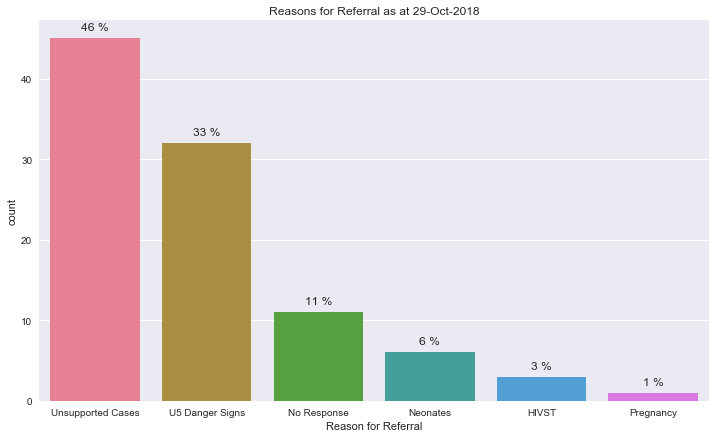

In [7]:
## Count of reasons for referral based on the broad categories
plotObject()
ax = sns.countplot( data=db, x="Reason for Referral", order=db["Reason for Referral"].value_counts().index )

# set % 
total = len( db["Reason for Referral"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f} %'.format(height/total*100),
            ha="center") 
    
plt.title('Reasons for Referral as at %s'% LAST_UPDATED ) ;

## Timing of Referrals

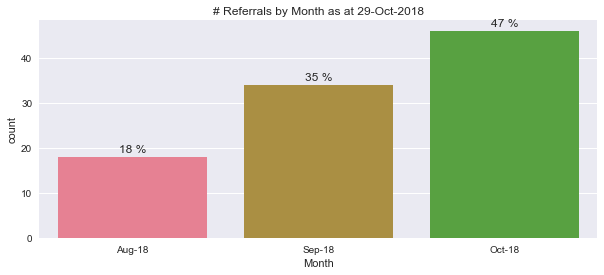

In [8]:
## 1.a. referrals by Month
plotObject(10,4)
ax = sns.countplot( data=db, x="Month" ) 
# set % 
total = len( db)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f} %'.format(height/total*100),
            ha="center") 
    
plt.title('# Referrals by Month as at %s'% LAST_UPDATED ) ;

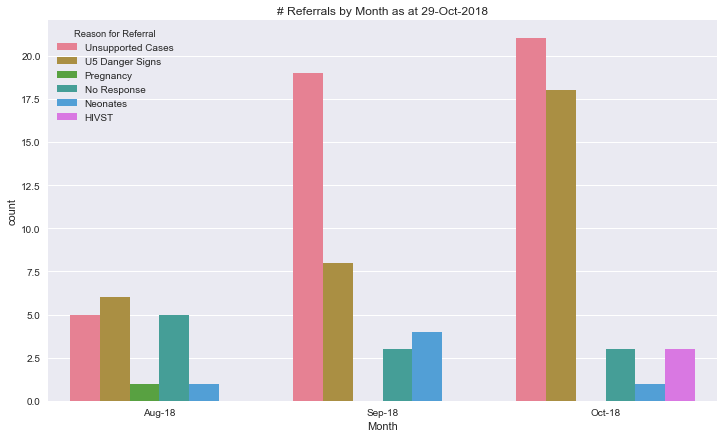

In [9]:
## 1.b referrals by Month and by reason 
plotObject()
ax = sns.countplot( data=db, x="Month" , hue="Reason for Referral",)  

plt.title('# Referrals by Month as at %s'% LAST_UPDATED) ;

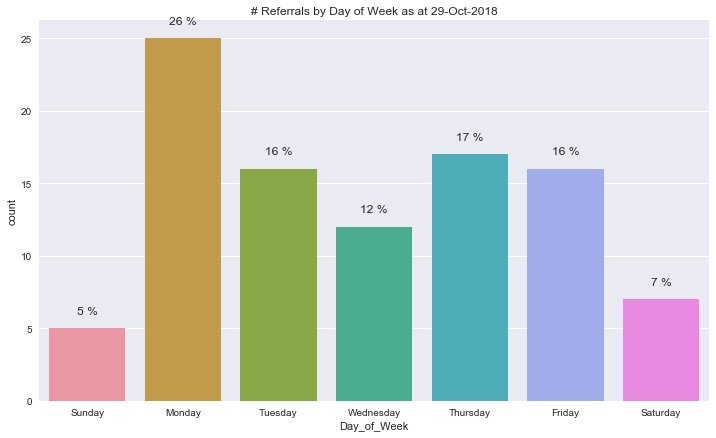

In [10]:
## 2. Referrals by Day of the Week
plotObject()
ax = sns.countplot( data=db, x="Day_of_Week", order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] )
# set % 
total = len( db)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 1,
            '{:1.0f} %'.format(height/total*100),
            ha="center") 
    
plt.title('# Referrals by Day of Week as at %s'% LAST_UPDATED ) ;

# Referrals by Day of Week as at 29-Oct-2018


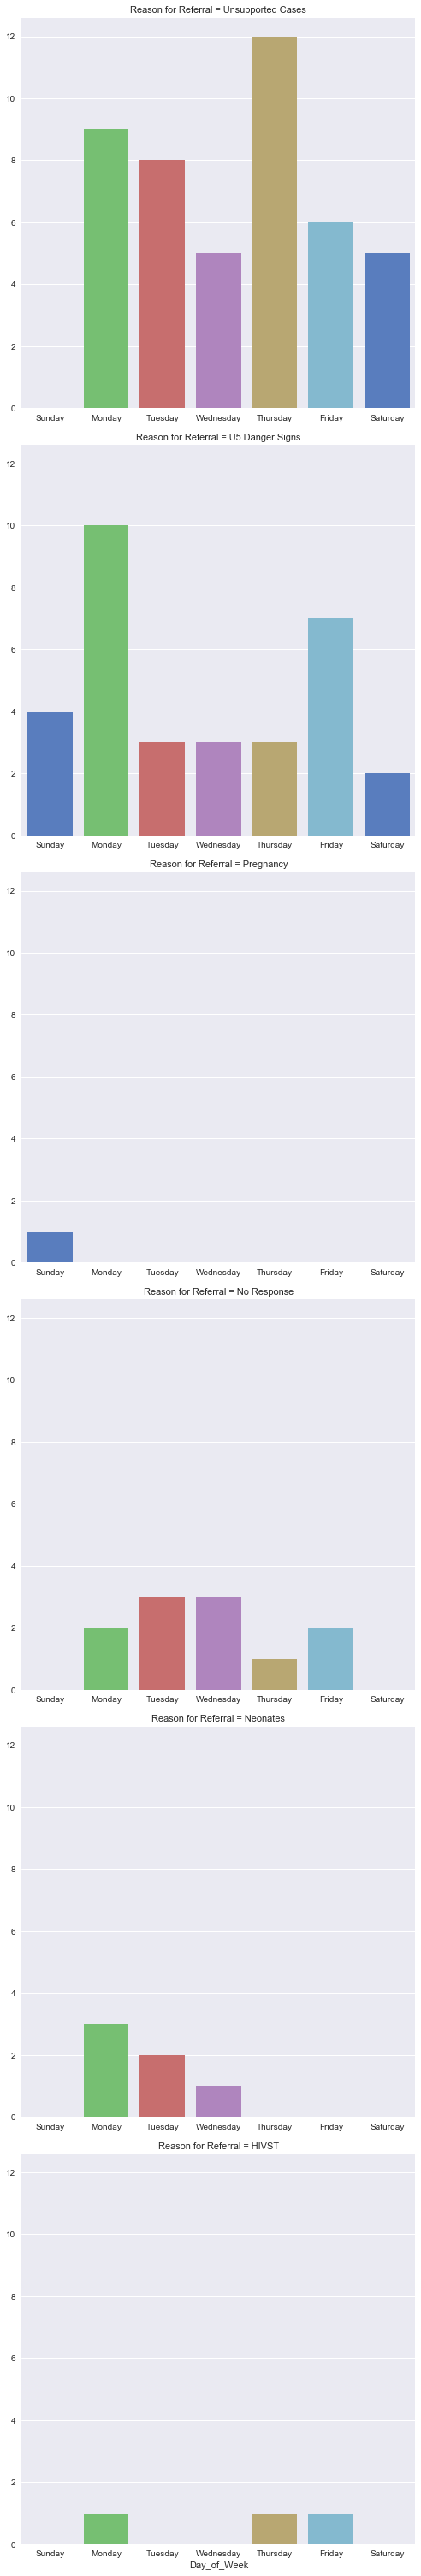

In [11]:
## 3. Referrals by Day of Week and Reason for Referral 
#plotObject( nc=3)

print('# Referrals by Day of Week as at %s'% LAST_UPDATED)

sns.FacetGrid(data=db, row="Reason for Referral", size=7, aspect=1 ).map( 
    sns.countplot, "Day_of_Week",  palette='muted', 
    order=["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"] ); #.add_legend()
